## xarray

https://xarray.pydata.org/en/stable/why-xarray.html

Integrate with [NumPy](http://www.numpy.org/) and [Pandas](http://pandas.pydata.org/), [Dask](http://dask.org/) for parallel computing, [matplotlit](http://matplotlib.org/) for plotting

Two core data structures

- DataArray - a labeled N-dimentional array (or N-D generalization of `pandas.Series`
- Dataset - facilitate array operations with heterogeneous data – dataset can have not only different data types, but also different numbers of dimensions. (generalized `pandas.DataFrame`)


`pip install xrray`

### [Scipy 2020 Tutorial](https://www.youtube.com/watch?v=mecN-Ph_-78&t=458s)


https://www.scipy2020.scipy.org/tutorial-information

https://xarray-contrib.github.io/xarray-tutorial/scipy-tutorial/00_overview.html#Tutorial-Setup

https://earth-env-data-science.github.io/lectures/xarray/xarray_intro.html


local folder:
- ~/project/xarray/xarray-tutorial
- virtualenv : source venv/bin/activate

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

### Create

In [2]:
data = xr.DataArray(
    np.random.randn(2, 3), 
    dims=("x", "y"), 
    coords={"x": [10, 20]}
)

In [3]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.15009393, -0.19007074,  1.03196468],
       [ 0.66841789, -1.66189274,  0.8905072 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [4]:
data.x

<xarray.DataArray 'x' (x: 2)>
array([10, 20])
Coordinates:
  * x        (x) int64 10 20

In [5]:
data.y

<xarray.DataArray 'y' (y: 3)>
array([0, 1, 2])
Dimensions without coordinates: y

In [8]:
# like in pandas, values is a numpy array that you can modify in-place
data.values

array([[ 0.15009393, -0.19007074,  1.03196468],
       [ 0.66841789, -1.66189274,  0.8905072 ]])

In [10]:
data.dims

('x', 'y')

In [11]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [12]:
data.attrs

{}

### Select

In [ ]:
# positional and by integer label, like numpy
data[0, :]

In [15]:
# loc or "location": positional and coordinate label, like pandas
data.loc[10]

<xarray.DataArray (y: 3)>
array([ 0.15009393, -0.19007074,  1.03196468])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [14]:
data[:,0]

<xarray.DataArray (x: 2)>
array([0.15009393, 0.66841789])
Coordinates:
  * x        (x) int64 10 20

In [17]:
# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([ 0.15009393, -0.19007074,  1.03196468])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [18]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)

<xarray.DataArray (y: 3)>
array([ 0.15009393, -0.19007074,  1.03196468])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

### Attributes (metadata)

In [19]:
data.attrs["long_name"] = "random velocity"

data.attrs["units"] = "metres/sec"

data.attrs["description"] = "A random variable created as an example."

data.attrs["random_attribute"] = 123

data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [23]:
# you can add metadata to coordinates too
data.x.attrs["units"] = "x units"
data.x.attrs

{'units': 'x units'}

In [21]:
data.attrs

{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [22]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.15009393, -0.19007074,  1.03196468],
       [ 0.66841789, -1.66189274,  0.8905072 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

### Processing

Data arrays work very similarly to numpy ndarrays:

In [24]:
data*10

<xarray.DataArray (x: 2, y: 3)>
array([[  1.50093929,  -1.90070744,  10.31964677],
       [  6.68417889, -16.61892743,   8.90507197]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [25]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.14953101, -0.18892837,  0.85830879],
       [ 0.61974512, -0.99585359,  0.77739088]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [26]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.15009393,  0.66841789],
       [-0.19007074, -1.66189274],
       [ 1.03196468,  0.8905072 ]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [27]:
data.sum()

<xarray.DataArray ()>
array(0.8890202)

In [28]:
data.x.sum()

<xarray.DataArray 'x' ()>
array(30)

In [29]:
data.isel(x=0).sum()

<xarray.DataArray ()>
array(0.99198786)
Coordinates:
    x        int64 10

In [30]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([ 0.40925591, -0.92598174,  0.96123594])
Dimensions without coordinates: y

In [31]:
data.sum(dim="x")

<xarray.DataArray (y: 3)>
array([ 0.81851182, -1.85196349,  1.92247187])
Dimensions without coordinates: y

### Plotting

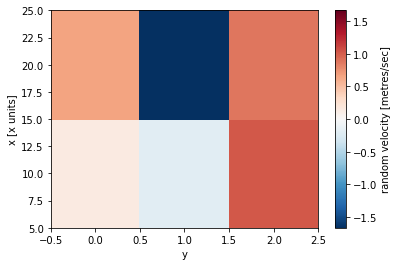

In [32]:
data.plot()